
  
<h2 align="center">
    Project: Permafrost Lakes in the US and Canada Data Visualization
</h2>




# **Introduction**

---

# Permafrost and Permafrost Lakes: What are they?

## Permafrost

Permafrost is a permanently frozen layer on or under Earth's surface. It consists of soil, gravel, and sand, usually bound together by ice. Permafrost usually remains at or below 0°C (32ºF) for at least two years.

Permafrost can be found on land and below the ocean floor. It is found in areas where temperatures rarely rise above freezing whether it is at high latitudes or high elevation. This means permafrost is often found in Arctic regions such as Greenland, the U.S. state of Alaska, Canada, Russia, China, and Eastern Europe.

Find out more:
https://education.nationalgeographic.org/resource/permafrost/

## Thermokarst Lakes

### Formation
Degradation of excess ground ice causes ground subsidence
and accumulation of surface water (pond formation). With
continued permafrost thaw, the pond laterally expands into a
lake as the shoreline erodes and collapses. The lake may also
expand vertically as a result of downward talik expansion (unfrozen
soil surrounded by permafrost) and ground subsidence following
thaw of ice-rich permafrost. With sustained permafrost thaw,
taliks expand vertically and laterally, and lake water may flow above
the permafrost or within the permafrost in intrapermafrost taliks.
If the talik extends through the entire permafrost thickness (most
likely where the permafrost is thin, such as the southern extent
of the discontinuous permafrost zone), the lake may expand (if
hydraulic pressure gradients point upward) or drain (if hydraulic
pressure gradients point downward). Increased nutrient flow
from groundwater upwelling may support new aquatic vegetation
such as floating mats. In both permafrost regions (continuous
and discontinuous), lake infilling may occur as thaw-induced
slope failure introduces sediments to the lake, or as a result of
enhanced sediment transport from increasing terrestrial–aquatic
connectivity. Surface lake drainage may occur when a new outlet
forms as a result of melting excess ground ice or an extreme
precipitation event that overtops the lake edge and initiates
mechanical and thermal erosion.  (from nature geoscience Elizabeth E. Webb & Anna K. Liljedahl: https://www.nature.com/articles/s41561-023-01128-z)  
These lakes can exceed 40% of the land surface in some Arctic lowlands and provide feeding and nesting sites for wildlife as well as water sources, hunting and fishing for local communities.

### Global warming impact
On millennial timescales, natural fluctuations in the number and size of lakes are common but decadal scale studies show that climate change is shifting these dynamic systems across a hydrological threshold, towards landscape-scale wetting (lake formation and/or expansion) or drying (lake drainage, desiccation or infilling). Shrinking lake area extent, for example, could mean a reduction in liquid water sources for villagers and habitat for fish and other aquatic organisms whereas Thermokarst lake initiation and expansion increase methane and carbon dioxide fluxes to the atmosphere.

Some additional ressources to find out more (these articles are accessible when you connect with your institution):  
https://www.nature.com/articles/s41561-023-01128-z  
https://www.nature.com/articles/s41558-022-01455-w  
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7411715/  
https://www.sciencedirect.com/science/article/pii/S0966842X20300913

## This project
In this project we will know about the lakes in North America with a focus on permafrost lakes using pandas skills and visualizing data using Python.
Note: for those  who are inconditionnal R fans, there is a library in Python similar to ggplot2. It is in the plotnine module.



# **Data Preprocessing**
---

# A Global Lake/Reservoir Surface Extent Dataset (GLRSED)

In this project we will be using a smaller version of the GLRSED dataset available at: https://drive.google.com/file/d/1aMyGb9QvuZZMzi5MM3Z2dk6RxpNblkEB/view?usp=sharing. In the version we are using, the geometry column is dropped and only the North America entries are retained. The original dataset can be found here: https://zenodo.org/records/8121174.    
It was created by team of researchers and we can find out more about their work and the dataset in this article: https://essd.copernicus.org/preprints/essd-2023-216/essd-2023-216.pdf.  

Using GLRSED, the objective of this project will be to identify the proportion of freshwater reserves dependent on permafrost in North America. Mountain and polar regions are expected to be more dependent on permafrost for their freshwater supply. The goal will be to identify critical regions whose freshwater reserves are might be strongly threatened by climate change.




> A DataFrame is a two-dimensional and potentially heterogeneous tabular data structure with labeled axes (rows and columns). DataFrames allow for storing, manipulating, and retrieving data in a structured form, serving as the primary data structure for a multitude of data processing tasks. It is used with Python libraries like pandas.  

Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [2]:
from google.colab import files

# Upload the csv file provided
uploaded = files.upload()

Saving GLRSED_NA.csv to GLRSED_NA.csv


In [4]:
import pandas as pd


In [5]:
#  Read the csv file using pandas and plot header
GLRSED = pd.read_csv('/content/GLRSED_NA.csv')
GLRSED.head()

<ipython-input-5-2a114a7b0ace>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  GLRSED = pd.read_csv('/content/GLRSED_NA.csv')


,Name,Hylak_ID,GRAND_ID,OSM_ID,Join_Cou_H,Join_Cou_G,Join_Cou_O,Shore_len,Lake_area,Longitude,...,Continent,Mountain,Endorheic,SWOT_obs,Reservoir,SWORD,GOODD,GeoDAR,Glacier,Permafrost
0,NaN,921521.0,NaN,NaN,1,0,0,3.102044,0.310252,-176.781123,...,North America,0,0,0,0,0,0,0,0,0
1,NaN,921390.0,NaN,NaN,1,0,0,1.567008,0.110133,-176.966325,...,North America,0,0,0,0,0,0,0,0,0
2,NaN,921323.0,NaN,NaN,1,0,0,1.584410,0.135493,-176.777580,...,North America,0,0,0,0,0,0,0,0,0
3,NaN,920779.0,NaN,NaN,1,0,0,2.169648,0.146950,-176.788984,...,North America,0,0,0,0,0,0,0,0,0
4,NaN,920757.0,NaN,NaN,1,0,0,1.448715,0.112359,-178.008301,...,North America,0,0,0,0,0,0,0,0,0


# Cleaning the data

 We'll drop the ones we won't use to optimize memory usage using https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html. Only keep the following columns: Shore_len,	Lake_area,	Longitude,	Latitude,	Country,	Mountain,	Endorheic,	Reservoir, GOODD,	SWORD,	Glacier,	Permafrost.  
A little work must be done with the different lake type columns:
- The permafrost and Endorheic columns should be 0 or 1. All non-zero values should be casted to 1.
- The GOODD and Reservoir categories are similar. The value of the Reservoir column should be set to 1 when the GOODD value is 1. When that's done, the GOODD column can be dropped.
- Some lakes don't belong in any categories. For future visulization purposes, a new category 'Other' should be added and the value should be set to 1 for all lakes that don't belong to any other category.

In [6]:
# Cast non-zero values in 'Permafrost' and 'Endorheic' to 1
GLRSED['Permafrost'] = GLRSED['Permafrost'].apply(lambda x: 1 if x != 0 else 0)
GLRSED['Endorheic'] = GLRSED['Endorheic'].apply(lambda x: 1 if x != 0 else 0)

# Set 'Reservoir' to 1 where 'GOODD' is 1
GLRSED['Reservoir'] = GLRSED.apply(lambda row: 1 if row['GOODD'] == 1 else row['Reservoir'], axis=1)

# Drop the 'GOODD' column
GLRSED = GLRSED.drop('GOODD', axis=1)

# Set value to 1 for lakes not in any other category
#category_columns = ['North_America', 'Africa', 'Eurasia', 'South_America', 'Oceania', 'Antarctica', 'Permafrost', 'Endorheic', 'Reservoir']
category_columns = [ 'Glacier', 'Mountain', 'SWORD', 'Permafrost', 'Endorheic', 'Reservoir']
GLRSED['Other'] = GLRSED[category_columns].sum(axis=1).apply(lambda x: 1 if x == 0 else 0)

In [10]:
# Select only the specified columns
columns_to_keep = ['Shore_len', 'Lake_area', 'Longitude', 'Latitude', 'Country', 'Mountain', 'Endorheic', 'Reservoir',  'SWORD', 'Glacier', 'Permafrost']
GLRSED = GLRSED[columns_to_keep]

Let's define the different categories of lakes present in the dataset:
- **Mountain**: the lake is located in a mountainous region and is located at high altitude
- **Endhoreic**: there is no water flowing out of the lake
- **Reservoir**: a reservoir is a manmade lake that is created when a dam is built on a river
- **SWORD**: the lake is located on a river
- **Glacier**: the lake is formed by the melting of a glacier. This category will intersect with Mountain and Permafrost.
- **Permafrost**: see introduction for more details on permafrost lakes

# Missing values
To check for missing values in the dataset, we'll plot a bar chart of the non NA values in our clean dataset.  
References:

- Counting the number of Non-NA values : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.notna.html  
-  matplotlib.pyplot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

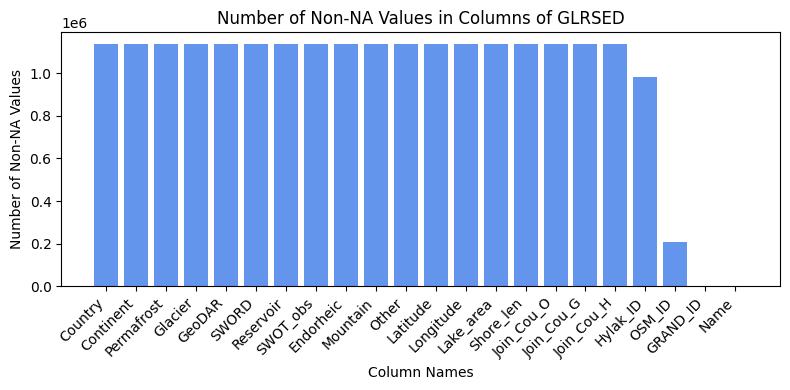

In [7]:
# count the non-NA values in each column
# there use the .notna() function from pandas
import matplotlib.pyplot as plt

not_na = GLRSED.notna().sum()

# sort the values in descending order
not_na= not_na.sort_values(ascending=False)

#  plot a bar chart using plt.bar()
plt.figure(figsize=(8, 4))
plt.bar( not_na.index,not_na, color='cornflowerblue')
plt.title('Number of Non-NA Values in Columns of GLRSED')
plt.xlabel('Column Names')
plt.ylabel('Number of Non-NA Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



*There are missing values in Hydrolakes dataset, Openstreet data set and GRAND*

According to the authors, the majority of the data in GLRSED comes from the HydroLAKES dataset, the OpenStreetMap dataset comes second and only a minority comes from the GRD dataset.

There are a lot of missing values in the OpenStreetMap dataset which leads to lakes and reservoir not being included in GLRSED.

In the case of the GLRSED dataset, assessing the quality of the data is not easy as levels of accuracy vary depending on the source. For the HydroLAKES database, which is the amalgamation of several sources, includes topographic and remote sensing data, each with varying degrees of accuracy. For OSM data, its quality varies among different locations because it is created without any formal qualification.

# **Data visualization**
---

## Lake Types in North America
Identification of the importance of permafrost lakes in North America. Let's plot a bar chart counting the number and summing the surface of lakes in each category.
References:

Pandas documentation pages for the key transformation :
- pd.DataFrame.melt(): https://pandas.pydata.org/docs/reference/api/pandas.melt.html
- pd.Dataframe.groupby(): https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
- DataFrameGroupBy.agg(): https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
- pd.DataFrame.merge(): https://pandas.pydata.org/docs/reference/api/pandas.merge.html


In [11]:
GLRSED.head()

,Shore_len,Lake_area,Longitude,Latitude,Country,Mountain,Endorheic,Reservoir,SWORD,Glacier,Permafrost
0,3.102044,0.310252,-176.781123,51.636300,UNITED STATES,0,0,0,0,0,0
1,1.567008,0.110133,-176.966325,51.639917,UNITED STATES,0,0,0,0,0,0
2,1.584410,0.135493,-176.777580,51.643770,UNITED STATES,0,0,0,0,0,0
3,2.169648,0.146950,-176.788984,51.659831,UNITED STATES,0,0,0,0,0,0
4,1.448715,0.112359,-178.008301,51.659535,UNITED STATES,0,0,0,0,0,0


In [13]:
# Melt the dataframe to long format
long_data = GLRSED.melt(id_vars=['Lake_area'], value_vars=category_columns , var_name='LakeType', value_name='IsType')

In [17]:
long_data.head()

,Lake_area,LakeType,IsType
0,0.310252,Glacier,0
1,0.110133,Glacier,0
2,0.135493,Glacier,0
3,0.146950,Glacier,0
4,0.112359,Glacier,0


In [14]:
North_America_summary=long_data.groupby('LakeType').agg(
    SumLake=('IsType', 'sum'),
    SumArea=('Lake_area', lambda x: pd.to_numeric(x, errors='coerce').sum())
).reset_index().sort_values('SumArea', ascending=False)


In [16]:
#North_America_summary =  North_America_summary[North_America_summary['IsType'] == 1]
North_America_summary.head()

,LakeType,SumLake,SumArea
0,Endorheic,11058,1.338427e+06
1,Glacier,4595,1.338427e+06
2,Mountain,62328,1.338427e+06
3,Permafrost,783346,1.338427e+06
4,Reservoir,7375,1.338427e+06


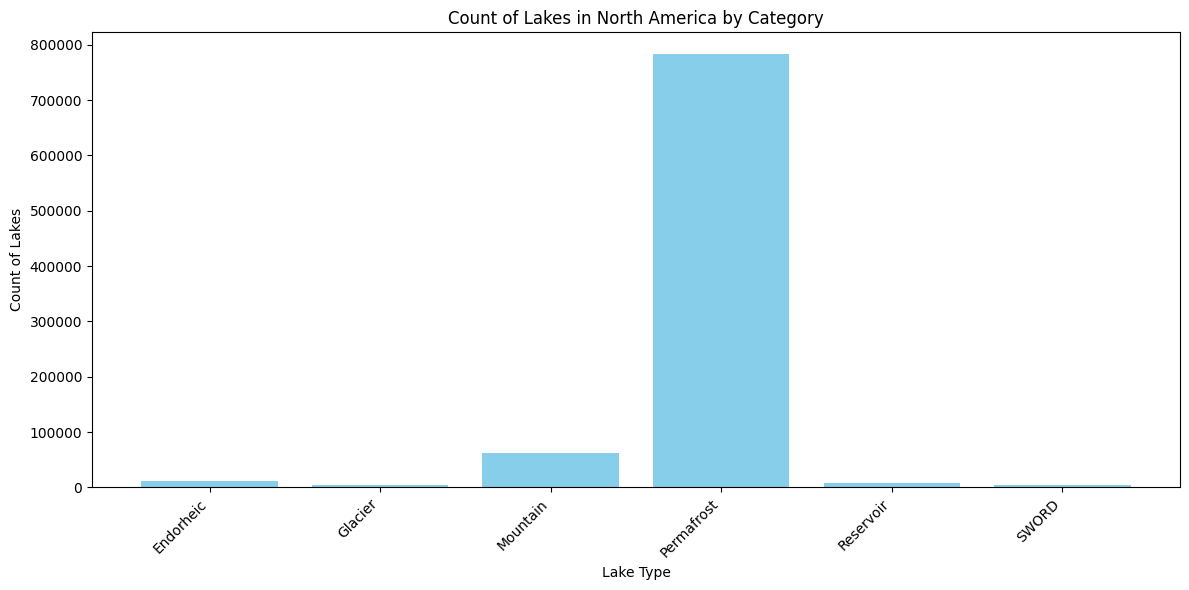

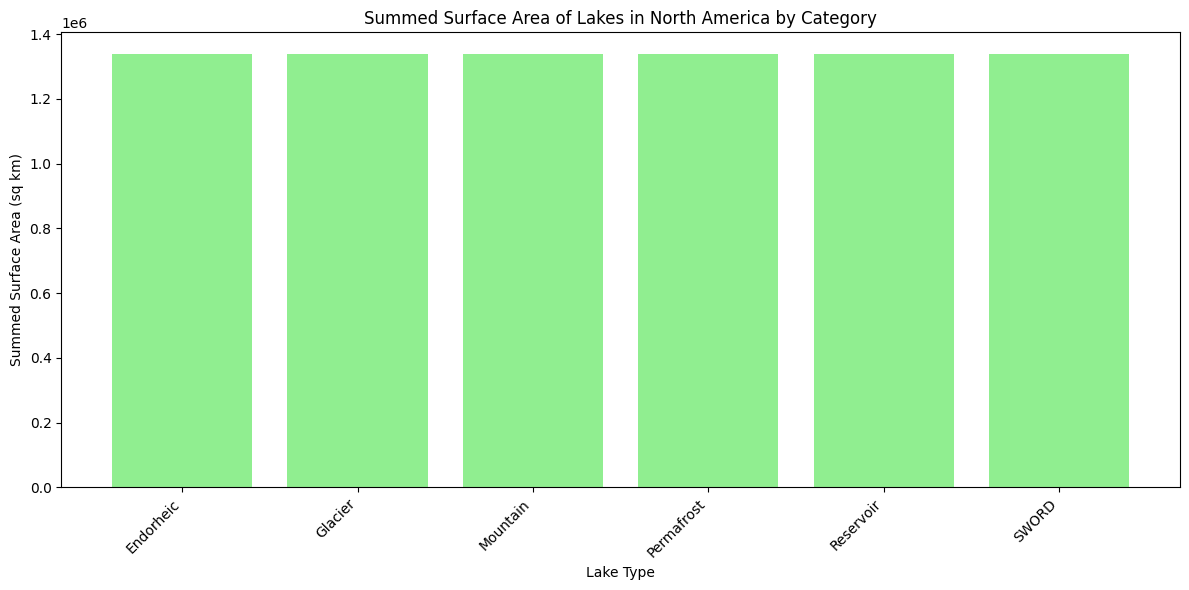

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(North_America_summary['LakeType'], North_America_summary['SumLake'], color='skyblue')
plt.xlabel('Lake Type')
plt.ylabel('Count of Lakes')
plt.title('Count of Lakes in North America by Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting the summed surface area of lakes in each category
plt.figure(figsize=(12, 6))
plt.bar(North_America_summary['LakeType'], North_America_summary['SumArea'], color='lightgreen')
plt.xlabel('Lake Type')
plt.ylabel('Summed Surface Area (sq km)')
plt.title('Summed Surface Area of Lakes in North America by Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Around 80000  permafrost lakes** are there in North America.They play an important role in providing fresh water to communities as these are the highest in number than any other lake type.

# Permafrost lakes location

Permafrost lakes are located at high altitudes and latitudes using the dataset at hand and smart data visualization.

## Dependence by country

Our dataset contains the lake data for countries in Central and North America. Let's try to identify a mix of lakes for each of these countries.
- Using pandas, let's create a dataframe summarizing the data by countries
- We'll add a column without the percentage of the number of lakes of said countries from each category. Some lakes are part of more than one category and will counted more than once doing this. The bars of some countries will therefore exceed 100%.
- Let's visualize this by creating a horizontal stacked bar chart using the altair library (much easier than using matplotlib): https://altair-viz.github.io/gallery/horizontal_stacked_bar_chart.html

In [21]:
# Melt the dataframe to long format
long_data = GLRSED.melt(id_vars=['Country'],
                        value_vars=['Mountain', 'Endorheic', 'Reservoir', 'SWORD', 'Glacier', 'Permafrost'],
                        var_name='LakeType',
                        value_name='IsType')


In [22]:
long_data.head()

,Country,LakeType,IsType
0,UNITED STATES,Mountain,0
1,UNITED STATES,Mountain,0
2,UNITED STATES,Mountain,0
3,UNITED STATES,Mountain,0
4,UNITED STATES,Mountain,0


In [23]:
# Filter for rows where 'IsType' is True (indicating the lake belongs to that category)
long_data = long_data[long_data['IsType'] == 1]

# Summarize data for each lake type by country
summary_by_country = long_data.groupby(['Country', 'LakeType']).agg(
    SumLake=('IsType', 'sum')
).reset_index()

# Calculate the total number of lakes per country
total_lakes_by_country = summary_by_country.groupby('Country')['SumLake'].sum().reset_index()
total_lakes_by_country.columns = ['Country', 'TotalLakes']

# Merge with summary_by_country to get the total number of lakes for each country
summary_by_country = pd.merge(summary_by_country, total_lakes_by_country, on='Country', how='left')

# Calculate the percentage of lakes for each lake type in each country
summary_by_country['PercentLakes'] = (summary_by_country['SumLake'] / summary_by_country['TotalLakes']) * 100

# Print the head of the dataframe to check your work
print(summary_by_country.head())


  Country   LakeType  SumLake  TotalLakes  PercentLakes
0  BELIZE   Mountain        4           8     50.000000
1  BELIZE  Reservoir        3           8     37.500000
2  BELIZE      SWORD        1           8     12.500000
3  CANADA  Endorheic     1760      757886      0.232225
4  CANADA    Glacier     2828      757886      0.373143


In [28]:
summary_by_country

,Country,LakeType,SumLake,TotalLakes,PercentLakes
0,BELIZE,Mountain,4,8,50.000000
1,BELIZE,Reservoir,3,8,37.500000
2,BELIZE,SWORD,1,8,12.500000
3,CANADA,Endorheic,1760,757886,0.232225
4,CANADA,Glacier,2828,757886,0.373143
...,...,...,...,...,...
60,UNITED STATES,Permafrost,57369,100790,56.919337
61,UNITED STATES,Reservoir,6030,100790,5.982736
62,UNITED STATES,SWORD,982,100790,0.974303
63,UNITED STATES銆丆ANADA,Reservoir,1,3,33.333333


In [32]:
permafrost_df = summary_by_country[summary_by_country['LakeType'] == 'Permafrost']
print(permafrost_df)

          Country    LakeType  SumLake  TotalLakes  PercentLakes
6          CANADA  Permafrost   723175      757886     95.420024
24      GREENLAND  Permafrost     2802        4029     69.545793
60  UNITED STATES  Permafrost    57369      100790     56.919337


In [29]:
permafrost_countries = summary_by_country[summary_by_country['LakeType'] == 'Permafrost']['Country'].unique()
print(permafrost_countries)

['CANADA' 'GREENLAND' 'UNITED STATES']


In [25]:
!pip install altair_viewer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 844.5/844.5 kB 9.6 MB/s eta 0:00:00


In [27]:


import altair as alt
import altair_viewer

# Create a horizontal stacked bar chart
chart = alt.Chart(summary_by_country).mark_bar().encode(
    x=alt.X('PercentLakes:Q', stack='normalize', axis=alt.Axis(format='%')),
    y=alt.Y('Country:N', sort=alt.EncodingSortField(field='TotalLakes', order='descending')),
    color='LakeType:N',
    tooltip=['Country', 'LakeType', 'SumLake', 'PercentLakes']
).properties(
    title='Percentage of Lakes by Category for Each Country in Central and North America',
    width=800,
    height=400
)




In [34]:
#chart.show()
# Save the chart as an HTML file
chart.save('chart.html')


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


<ipython-input-35-2e46e5f319b4>:12: UserWarning: Glyph 37510 (\N{CJK UNIFIED IDEOGRAPH-9286}) missing from current font.
  plt.tight_layout()
<ipython-input-35-2e46e5f319b4>:12: UserWarning: Glyph 19974 (\N{CJK UNIFIED IDEOGRAPH-4E06}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37510 (\N{CJK UNIFIED IDEOGRAPH-9286}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19974 (\N{CJK UNIFIED IDEOGRAPH-4E06}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


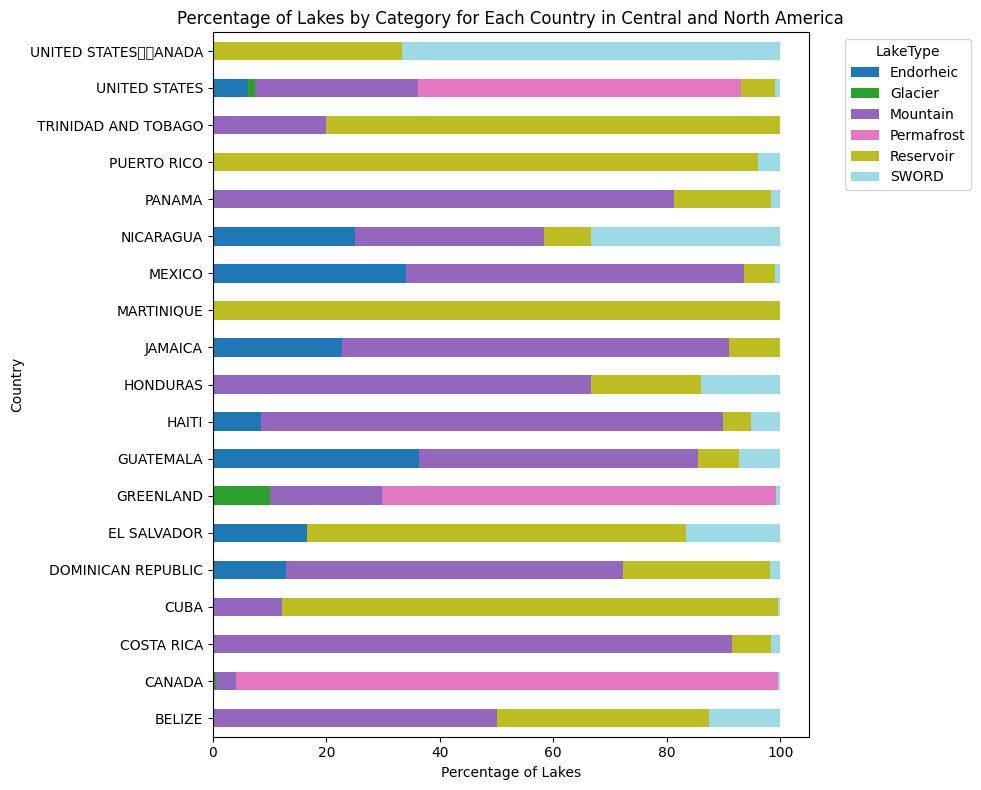

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data
pivot_df = summary_by_country.pivot(index='Country', columns='LakeType', values='PercentLakes').fillna(0)

# Plot
ax = pivot_df.plot(kind='barh', stacked=True, figsize=(10, 8), colormap='tab20')
ax.set_xlabel('Percentage of Lakes')
ax.set_title('Percentage of Lakes by Category for Each Country in Central and North America')
plt.legend(title='LakeType', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()


*Canada, Greenland and USA  has  the permafrost lakes with a  proportion of permafrost lakes as 95%, 69% and 56% respectively.*

## Dependence by Latitude

Intuitively, we said that permafrost lakes were located at higher latitudes. Let's verify this.
- Bin latitude into 2-degrees interval. Latitudes in our dataset vary from 0° to 90°.
- Plot the number of lakes of each category in each latitude bin in a vertical stacked bar chart  

Reference: Latitude and Longitude https://www.britannica.com/science/latitude

In [37]:
import numpy as np

# Binning latitude into 2-degree intervals starting from 0°
GLRSED['LatBin'] = pd.cut(GLRSED['Latitude'], bins=np.arange(0, 91, 2))

#  aggregate data by Latitude Bins

#category_columns = ['Glacier', 'Mountain', 'SWORD', 'Permafrost', 'Endorheic', 'Reservoir', 'Other']

latidute_summary = GLRSED.groupby(['LatBin']).agg(CountPermafrost=('Permafrost', 'sum'),
                                                 CountGlacier=('Glacier', 'sum'),
                                                 CountSWORD=('SWORD', 'sum'),
                                                 CountMountain=('Mountain', 'sum'),
                                                 CountReservoir=('Reservoir', 'sum'),
                                                 CountEndorheic=('Endorheic', 'sum'),
                                                 ).reset_index()

<ipython-input-37-602e58b3b0b7>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  latidute_summary = GLRSED.groupby(['LatBin']).agg(CountPermafrost=('Permafrost', 'sum'),


In [39]:
latidute_summary.head()

,LatBin,CountPermafrost,CountGlacier,CountSWORD,CountMountain,CountReservoir,CountEndorheic
0,"(0, 2]",0,0,0,0,0,0
1,"(2, 4]",0,0,0,0,0,0
2,"(4, 6]",0,0,0,0,0,0
3,"(6, 8]",0,0,0,13,0,0
4,"(8, 10]",0,0,2,105,17,0


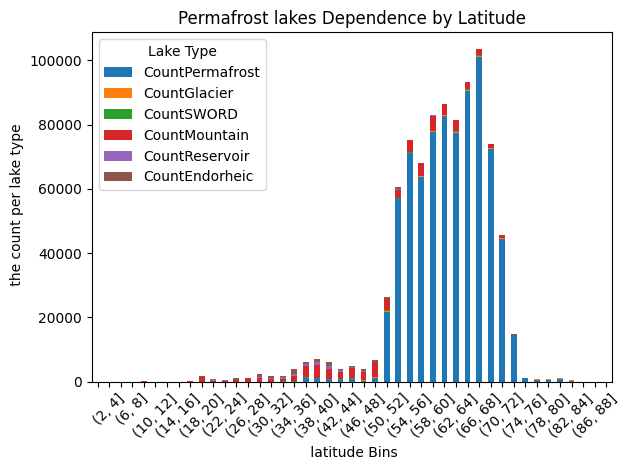

In [40]:
# using DataFrame.plot() from pandas, plot a stacked histogram with x= latitude Bins and y= the count per lake type.
# For help, refer to https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
#  labelled axes and chose a title using matplotlib.pyplot
import matplotlib.pyplot as plt # Import the matplotlib library
plot= latidute_summary.plot(x='LatBin', kind='bar', stacked=True)
plt.title('Permafrost lakes Dependence by Latitude')
plt.xlabel(' latitude Bins')
plt.ylabel(' the count per lake type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.setp(plot.axes.get_xticklabels()[::2], visible=False)
plt.legend(title='Lake Type')

plt.tight_layout()
plt.show()


*Majority of the permafrost lakes  are located in between (50,72]*

## Heatmap of permafrost lakes

Our last plot will be the most complex one. Building on our plots by countries and latitude, we willl now plot a map of North America superposed with a heatmap of the number of permafrost lakes.
A few hints:
- A world map is available in the geopandas library using .datasets.get_path('naturalearth_lowres'). You should filter the desired countries.
- Bin our clean dataset based on latitude and longitude with 1-degree intervals and group the dataset based on these bins.
- To plot the heatmap we are going to use the imshow funtion from matplotlib. In order to do so you should create a matrix with rows being latitude bins, columns being longitude bins and filled with the number of permafrost lakes in square ixj.


<ipython-input-42-53cac7d7554b>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


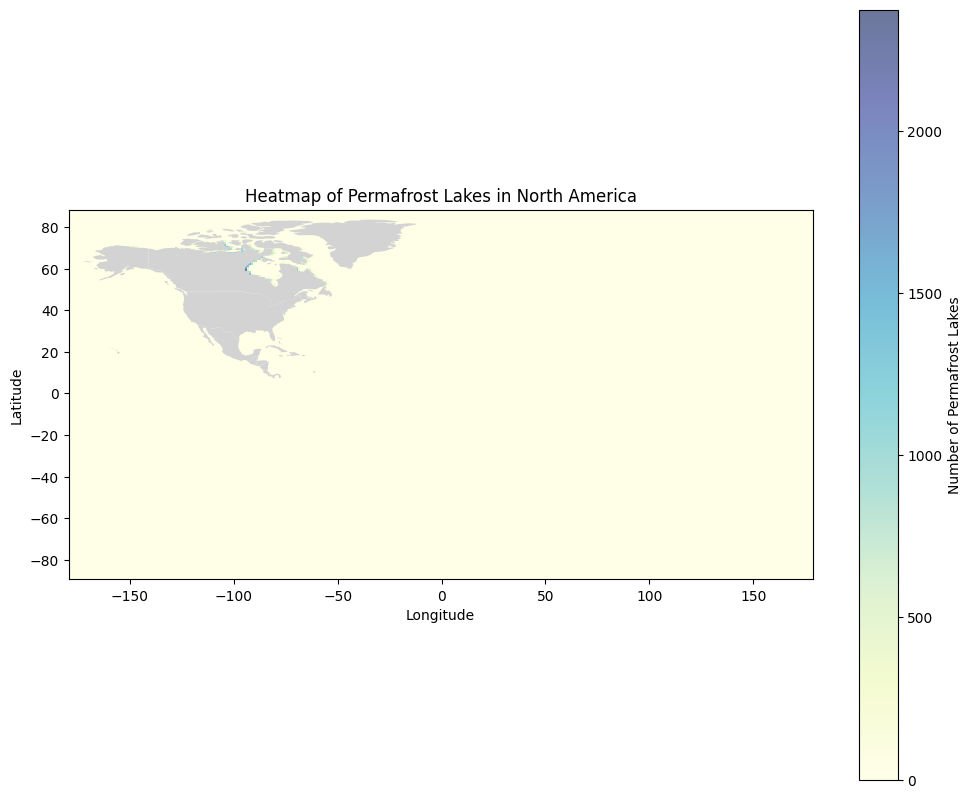

In [42]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for North American countries
north_america = world[world['continent'] == 'North America']
# Define the latitude and longitude bins (1-degree intervals)
latitude_bins = np.arange(-90, 90, 1)
longitude_bins = np.arange(-180, 180, 1)

# Add a bin column for latitude and longitude
GLRSED['lat_bin'] = np.digitize(GLRSED['Latitude'], bins=latitude_bins)
GLRSED['lon_bin'] = np.digitize(GLRSED['Longitude'], bins=longitude_bins)
# Group by latitude and longitude bins and count the number of permafrost lakes
heatmap_data = GLRSED.groupby(['lat_bin', 'lon_bin'])['Permafrost'].sum().unstack(fill_value=0)
# Ensure the matrix is in the correct shape
heatmap_data = heatmap_data.reindex(index=np.arange(len(latitude_bins)), columns=np.arange(len(longitude_bins)), fill_value=0)

# Define latitude and longitude ranges for the heatmap
lat_range = np.arange(-90, 90, 1)[:-1] + 0.5
lon_range = np.arange(-180, 180, 1)[:-1] + 0.5

# Plot the map of North America
fig, ax = plt.subplots(figsize=(12, 10))
base = north_america.plot(ax=ax, color='lightgray')

# Plot the heatmap
cax = ax.imshow(heatmap_data.values, interpolation='nearest', cmap='YlGnBu', origin='lower',
                 extent=[lon_range.min(), lon_range.max(), lat_range.min(), lat_range.max()],
                 alpha=0.6)

# Add a colorbar
fig.colorbar(cax, ax=ax, orientation='vertical', label='Number of Permafrost Lakes')

# Set title and labels
ax.set_title('Heatmap of Permafrost Lakes in North America')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()




*High latitude locations has permafrost lakes more in number than any other lake type. The locations where majority of the permafrost lakes are located would be recommended for detailed exploration and analysis as this would be beneficial for the states located in that latitude interval (50,72] degrree North. Canada,Greenland and USA states *

Other countries falling in the latitude intervalof (50,72] degree North would be recommended to be explored on permafrost lake water dependency and benefits as these provide with fresh water which is valuable resource. A Russia is located at 61 degree North  latitude and longitude of 105 degree  East, Norway located at 60.4720° N, 8.4689° E  could also be recommended for exploration and analysis.

These regions with permafrost lakes will face the following problems:

- It cannot support the weight of the soil and vegetation above it.
-  Infrastructure such as roads, buildings, and pipes could be damaged as permafrost thaws, settles and become unstable.The materials released when permafrost thaws can lead to changes in lake water quality, including increases in the amount of dissolved salts, how acidic the water is, how clear it is, and how many nutrients there are.

- Permafrost melts in few countries such as Canada and Siberia causes microbes entombed in the frozen soil for millennia to begin releasing methane, a greenhouse gas with 20 times the warming power of carbon dioxide.These greenhouse gases further warm the planet, creating a positive feedback loop that thaws more permafrost.

- Climate warming leads to the aggravation of infrastructures and environmental risks in permafrost regions.

- When severe structural damages occur in the permafrost regions as the ground beneath them thaws and shifts. This presents significant logistical and financial challenges, especially in Arctic regions, where whole communities may have to relocate.

- When permafrost thaws, so do ancient bacteria and viruses in the ice and soil. These newly-unfrozen microbes could make humans and animals very sick. Scientists have discovered microbes more than 400,000 years old in thawed permafrost.

-  The presence of permafrost in the tundra restricts root growth, limits nutrient availability, causes waterlogging, leads to frost heaving, and influences the composition of plant species in the ecosystem.
 - The severity of melting permafrost will vary amongst regions and flooding or drought may occur, depending on the surrounding drainage patterns. Melting permafrost, in areas of poor drainage, can increase the level of water within the soils.

 - Subsidence is a serious problem for farmers in permafrost regions as fertile topsoil is lost and areas may become waterlogged. “Subsidence also damages farm infrastructure, such as fences and buildings, while making it difficult or impossible to use farm equipment in fields that are no longer level,”

# Solutions:
 - It is recommended to convert the permafrost regions to a helpful thing in whatever possible way that mnimizes any type of loss and risk.For example, communities with permafrost that is at or below -4°C, on average, can consider insulating the ground from the heat of a building with gardens, mulch, or gravel. Mechanized refrigeration or thermosyphons can be very effective at preserving permafrost, but hard to do under existing buildings.

 - Small bits of plastic are frozen deep in the ice there, which is bad news for Arctic wildlife. We can help tackle this by using less plastic, choosing reusable products when possible, and always recycling paper, plastic, glass, newspaper, and aluminium!

- We can  slow down the melting of glaciers: Reduce Carbon Emissions. The most effective way is to reduce greenhouse gas emissions, which are a major cause of global warming. This can be done by using renewable energy sources, improving energy efficiency, and reducing deforestation.

 -  Experts recommend painting roads white to reflect more heat and keep them cooler. A cooler road surface helps prevent frozen ground from thawing underneath.



<h3 align = 'center' >
Thank you
</h3>

